<a href="https://colab.research.google.com/github/moonbeam87/Senior-Research/blob/master/Senior_Reserch_Rough_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR Encryption
One key basic XOR Encryption example

In [1]:
data = 1000

In [2]:
key = 20

In [3]:
data = data^key

In [4]:
print(data)

1020


In [5]:
data = data^key

In [6]:
data

1000

The main limitations of XOR encryption is that it's dependent on key length. If key length isn't equal to the text you're encrypting it's easily breakable. This is called a one time pad. The key must be as long as the text (or longer) and can't be reused. In addition, the random number generator must be truly random which is difficult to do at large lengths.

In [7]:
n=int(input("Enter number:"))
count=0
while(n>0):
    count=count+1
    n=n//10

Enter number:5


In [8]:
from random import randint
def rand(n):
  start = 10**(n-1)
  end = (10**n)-1
  return randint(start, end)

#key = rand(count)

In [9]:
key

20

In [10]:
d = rand(4)
print(d)
y = d
y = y^key
print(y)
y = y^key
print(y)

7388
7368
7388


Let's try and XOR encrypt an image

In [11]:
!pip3 install pylab

ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab


In [12]:
from pylab import imshow, show, get_cmap

In [13]:
from numpy import random

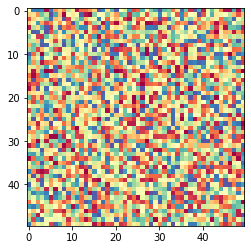

In [14]:
Z = random.random((50, 50))
imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
show()

In [15]:
from pylab import plt
import numpy as np


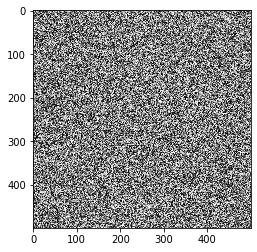

In [16]:
Z = np.random.random((500,500))   # Test data
plt.imshow(Z, cmap='gray', interpolation='nearest')
plt.show()

In [17]:
from PIL import Image

In [18]:
imarray = np.random.rand(100,100,3) * 255
im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
im.save('result_image.png')

In [19]:
show('result_image.png')

In [20]:
import scipy

In [21]:
import cv2 as cv

In [22]:
im = cv.imread('result_image.png')

In [23]:
print(im)

[[[100 202 221]
  [ 26 210  36]
  [243  95 146]
  ...
  [ 76  92 215]
  [233 246 142]
  [126 204  93]]

 [[120 192 177]
  [207 172 204]
  [ 12 105  65]
  ...
  [137 225 179]
  [124 231 193]
  [205 224  75]]

 [[ 24 211  35]
  [142  14 197]
  [118 223 173]
  ...
  [ 72 162  11]
  [165  38 122]
  [ 11 192 188]]

 ...

 [[ 38 146  76]
  [122 118 252]
  [102 218 191]
  ...
  [ 83  26  79]
  [136 230 252]
  [224 239 252]]

 [[171 214 177]
  [  6 149  51]
  [122  56  60]
  ...
  [233  87  13]
  [ 71 118 151]
  [158 141  47]]

 [[179 250  32]
  [240 194 211]
  [122 144  16]
  ...
  [115 116  82]
  [ 89 240  50]
  [159 130 185]]]


In [24]:
print(type(im))

<class 'numpy.ndarray'>


In [25]:
print(len(im))

100


In [26]:
key = random.random(1)

In [27]:
print(key)

[0.91191339]


# Steganography Test

In [29]:
import numpy as np


In [30]:
def random_image():
  return np.random.randint(0, 256, 256)/255.0

In [31]:
random_image

<function __main__.random_image>

In [32]:
print(random_image)

<function random_image at 0x7f408d72de18>


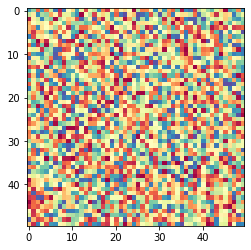

In [33]:
Z = random.random((50, 50))
imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
show()

In [34]:
import random

In [39]:
#Credit to https://github.com/Whiax/Random-Image-Dataset/blob/master/main.py#L2
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt

#methods
#random integer
def irunif(mi,ma):
    return np.random.randint(min(mi,ma), max(mi,ma))
ir = irunif
rc = random.choice

#random batch
def getBatch(batch_size=50, image_size=300, minsize=8, maxsize=80, verbose=0, display=0):
    #init
    pad = 20
    channel_size = 3
    images = np.zeros((batch_size,image_size,image_size,channel_size))
    boxes = list()
    
    #batch creation, for each image in the batch
    tic = int(round(time.time() * 1000))
    for img in images:
        n_point = ir(3,5)
        n_object = ir(3,50)
        boxes.append(np.zeros((n_object,4,1,2),dtype=np.int32))
        #for each object to draw
        for o in range(n_object):
            #build image
            cx,cy = ir(pad,image_size-1-pad),ir(pad,image_size-1-pad)
            sx,sy = ir(minsize,maxsize),ir(minsize,maxsize)
            rpoints = [(cx+ir(minsize-1,sx)*rc((-1,1)),cy+ir(minsize-1,sy)*rc((-1,1))) for i in range(n_point)]
            ctr = np.array(rpoints).reshape((-1,1,2)).astype(np.int32)
            r,g,b = irunif(0,255),irunif(0,255),irunif(0,255)
            c = (r,g,b)
            cv2.drawContours(img, [ctr], 0, c, -1)
            
            #build box
            ctr = ctr[:,0,:]
            topleft = (min(ctr[:,0]),min(ctr[:,1]),)
            topright = (min(ctr[:,0]),max(ctr[:,1]),)
            bottomright = (max(ctr[:,0]),max(ctr[:,1]),)
            bottomleft = (max(ctr[:,0]),min(ctr[:,1]),)
            boxes[-1][o] = np.array([topleft,topright,bottomright,bottomleft]).reshape(-1,1,2)
            #cv2.drawContours(img, [boxes[-1][o]], 0, c, -1)
    toc = int(round(time.time() * 1000))
    delay = toc-tic
    
    #display time to generate batch
    if verbose:
        print("Generated in ", delay,'ms')
        
    #display first image
    if display:
        plt.imshow(images[0])
        plt.show()
        
    #return everything
    return images,boxes


In [35]:
def generate_images(n):
  for i in range(n):
    s = "image"+str(i)+".png"
    imarray = np.random.rand(100,100,3) * 255
    im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
    im.save(s)

In [40]:
generate_images(100)

In [41]:
#Credit to https://github.com/Whiax/Random-Image-Dataset/blob/master/main.py#L2
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_images(n):
  for i in range(n):
    s = "image"+str(i)+".png"
    imarray = np.random.rand(100,100,3) * 255
    im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
    im.save(s)
